![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products.

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [5]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Read CSV files
workout = pd.read_csv('data/workout.csv')
workout.head()

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


In [7]:
# Year when the global search for 'workout' at its peak
peak = workout.query('workout_worldwide == workout_worldwide.max()')
year_str = peak['month'].iloc[0][:4]
year_str

'2020'

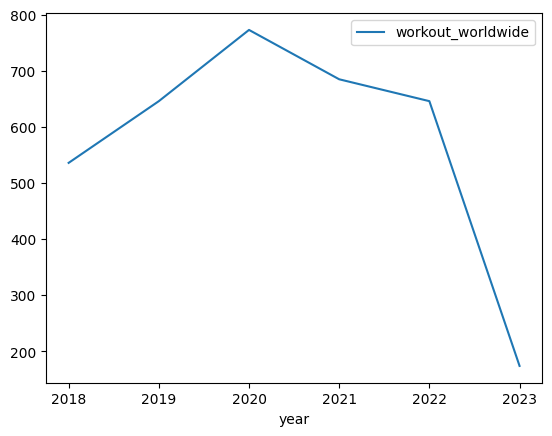

In [8]:
# A plot
workout['year'] = workout['month'].str[:4]
yearly_workout = workout.groupby('year')['workout_worldwide'].sum().reset_index()
yearly_workout.plot(x='year', y='workout_worldwide', kind='line')
plt.show()

In [15]:
# Most popular keywords during the covid pandemic and now
pandemic = '2020'
now = '2023'
three_keywords = pd.read_csv('data/three_keywords.csv')
three_keywords['year'] = three_keywords['month'].str[:4]
yearly = three_keywords.groupby('year').sum().reset_index()[['year', 'home_workout_worldwide', 'gym_workout_worldwide','home_gym_worldwide']]
workout_2020 = yearly.query('year == @pandemic')[['home_workout_worldwide', 'gym_workout_worldwide','home_gym_worldwide']].max()
print(workout_2020)
workout_2023 = yearly.query('year == @now')[['home_workout_worldwide', 'gym_workout_worldwide','home_gym_worldwide']].max()
print(workout_2023)
peak_covid = 'home workout'
current = 'gym workout'

home_workout_worldwide    327
gym_workout_worldwide     171
home_gym_worldwide        239
dtype: int64
home_workout_worldwide    44
gym_workout_worldwide     62
home_gym_worldwide        39
dtype: int64


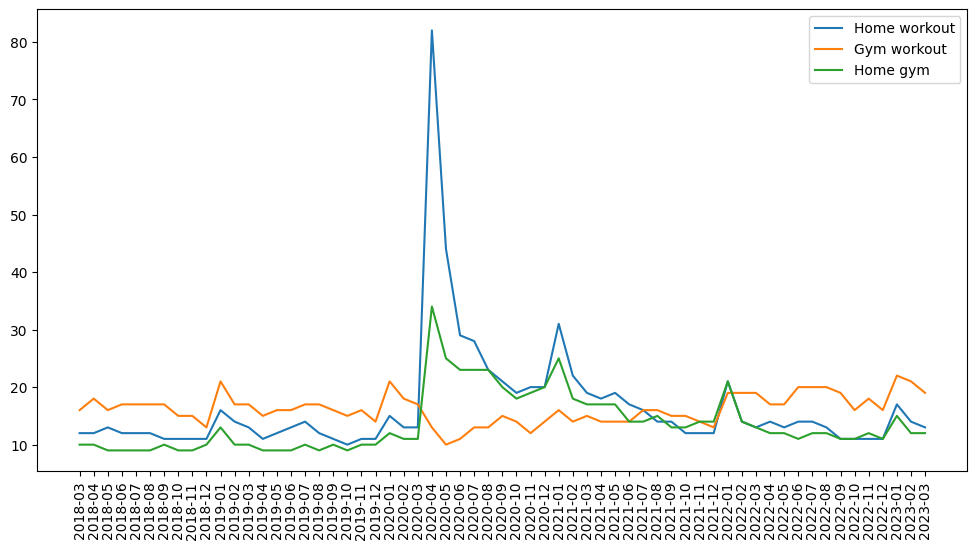

In [10]:
# Visualization of the three keywords
plt.figure(figsize=(12, 6))
plt.plot(three_keywords["month"], three_keywords["home_workout_worldwide"], label="Home workout")
plt.plot(three_keywords["month"], three_keywords["gym_workout_worldwide"], label="Gym workout")
plt.plot(three_keywords["month"], three_keywords["home_gym_worldwide"], label="Home gym")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [11]:
# Country with the highest interest for workouts
workout_global = pd.read_csv("data/workout_geo.csv")
selected_countries = ['United States', 'Australia', 'Japan']
workout_countries = workout_global[workout_global['country'].isin(selected_countries)]
top_country = workout_countries[workout_countries['workout_2018_2023'] == workout_countries['workout_2018_2023'].agg('max')]['country'].reset_index(drop=True)[0]
top_country

'United States'

In [13]:
# Country with the highest interest in home workouts
three_keywords_global = pd.read_csv('data/three_keywords_geo.csv')
countries = ['Philippines', 'Malaysia']
two_countries = three_keywords_global.loc[three_keywords_global['Country'].isin(countries)]
home_workout_geo = two_countries.sort_values(by='home_workout_2018_2023', ascending=False)['Country'][23]
home_workout_geo

'Philippines'